<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Arabic Image Contextualization for the Visually Impaired</div>

<div>
<img src="https://previews.123rf.com/images/asafeliason/asafeliason1402/asafeliason140200123/25975117-arabic-alphabet-texture-background-high-resolution.jpg">    
</div>
<div>   

<br> </br> 
<img src="https://iq.opengenus.org/content/images/2020/06/Machine-Caption.png" width="550/">    
</div>
<img src="https://user-images.githubusercontent.com/9033365/50055400-181f5580-0157-11e9-8a00-1d7af672b49f.png" width="550/">    
</div>

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 12px;border-style: solid;border-color: dark green;"><p><b><a href="https://www.mentalfloss.com/article/535618/super-ekg-could-diagnose-heart-disease-90-seconds" target=""></a></b></p></div>


# 0. **Introduction** <a class="anchor" id="0"></a>
"An Image Caption Generator is a deep learning application that generates captions and descriptions for images. The model is trained by passing an image to it and generating a corresponding caption or description. This field of research is challenging because it requires the model to understand and interpret the image content and convert it into natural language. This process involves utilizing methods from computer vision and natural language processing. The compositionality and nature of both language and visual information play a crucial role in training the model. The model must be trained on the co-occurrence of objects in the dataset context and must be able to generalize. Unlike the human brain, computers struggle to understand image content, and thus, models must be built to facilitate this process. The power of deep learning methods has enabled state-of-the-art results in image caption generation, allowing the creation of a single model that can predict a caption and generate a photo. Text preprocessing is a crucial step when dealing with natural language data, and it requires converting the text data into a format that machines can understand. This process is language-specific, and each language requires a specific approach." [[Source](https://www.analyticsvidhya.com/blog/2021/12/step-by-step-guide-to-build-image-caption-generator-using-deep-learning/)]

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color:#4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>Objectives</b></font>  
        This notebook has two main objectives:

<ul>
<li> Image Captioning: Generating natural language captions that describe the content of an image in a concise and informative way.
<li> Object Recognition: Identifying the objects and entities present in the image and providing additional information about them, such as their names, sizes, colors, and positions.
<li> Scene Description: Providing a detailed description of the scene depicted in the image, including its context, spatial layout, and relationships between objects.
<li> Navigation Assistance: Providing guidance to visually impaired individuals to help them navigate through the environment depicted in the image.

</ul>        
</blockquote>


# `1.` **`Model Structure`** <a class="anchor" id="1"></a>

### `Import Libraries`

In [108]:
import os #Os module for operating system related functionalities
import cv2 #cv2 module for computer vision tasks using OpenCV
import imageio  #Imageio module for reading and writing images
from keras.layers import Dense  #Import the Dense layer from Keras for fully connected layers
from keras.layers import Conv2D  #Import the Conv2D layer from Keras for convolutional layers
from keras.layers import Flatten  #Import the Flatten layer from Keras for flattening the input
from keras.layers import MaxPool2D  #Import the MaxPool2D layer from Keras for max pooling
from keras.models import Sequential  #Import the Sequential model from Keras for linear stack of layers
from tensorflow.keras.models import Model  #Import the Model class from TensorFlow Keras for defining models
from keras.applications.vgg19 import VGG19  #Import the VGG19 model from Keras applications
from keras.applications.xception import Xception  #Import the Xception model from Keras applications
from tensorflow.keras.applications.resnet50 import ResNet50  #Import the ResNet50 model from TensorFlow Keras applications
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input  #Import the VGG16 model and preprocess_input function from TensorFlow Keras applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array  #Import the load_img and img_to_array functions from TensorFlow Keras preprocessing

## `Feature Extract using VGG-16`:

## Introduction on VGGNet
VGGNet, also known as the **Visual Geometry Group Network**, is a convolutional neural network (CNN) architecture proposed by the Visual Geometry Group at the University of Oxford. It is one of the pioneering deep learning models in computer vision and has achieved state-of-the-art performance on various image recognition tasks, including image classification, object detection, and segmentation. VGGNet is characterized by its simple yet powerful architecture, consisting of multiple stacked convolutional layers with small filter sizes and max-pooling layers. Its success has led to the development of other deep learning models with similar architectures. In this context, this model has been widely used as a benchmark for comparing the performance of other deep learning models in computer vision tasks.

## The network structure
The VGG-16 architecture consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. The convolutional layers are divided into five groups, with two or three convolutional layers in each group, followed by a max-pooling layer. Specifically, VGG-16 has:

- **13 convolutional layers.**
- **5 max-pooling layers.**
- **3 fully connected layers.**


 **Block 1:**

- Convolutional layer with 64 filters and a kernel size of (3, 3)
- Convolutional layer with 64 filters and a kernel size of (3, 3)
- Max pooling layer with a pool size of (2, 2) and stride (2, 2)


**Block 2:**

- Convolutional layer with 128 filters and a kernel size of (3, 3)
- Convolutional layer with 128 filters and a kernel size of (3, 3)
- Max pooling layer with a pool size of (2, 2) and stride (2, 2)


**Block 3:**

- Convolutional layer with 256 filters and a kernel size of (3, 3)
- Convolutional layer with 256 filters and a kernel size of (3, 3)
- Convolutional layer with 256 filters and a kernel size of (3, 3)
- Max pooling layer with a pool size of (2, 2) and stride (2, 2)


**Block 4:**

- Convolutional layer with 512 filters and a kernel size of (3, 3)
- Convolutional layer with 512 filters and a kernel size of (3, 3)
- Convolutional layer with 512 filters and a kernel size of (3, 3)
- Max pooling layer with a pool size of (2, 2) and stride (2, 2)


**Block 5:**

- Convolutional layer with 512 filters and a kernel size of (3, 3)
- Convolutional layer with 512 filters and a kernel size of (3, 3)
- Convolutional layer with 512 filters and a kernel size of (3, 3)
- Max pooling layer with a pool size of (2, 2) and stride (2, 2)


- The convolutional layers have a filter size of 3x3 with a stride of 1 pixel, and the max-pooling layers have a filter size of 2x2 with a stride of 2 pixels. The first two fully connected layers each have 4,096 neurons, while the final fully connected layer has 1,000 neurons, corresponding to the 1,000 classes in the ImageNet dataset.

The following figure is VGG Structure diagram:


![title](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*NNifzsJ7tD2kAfBXt3AzEg.png)

In [109]:
# Load the model 
# It means that the fully connected layers at the top of the network will not be included.
# The parameter weights='imagenet' in the VGG16 model configuration specifies the weight initialization to be used in the model.
# In this case, 'imagenet' refers to the pre-trained weights that were trained on the ImageNet dataset.
model_vgg16 = VGG16(weights= 'imagenet', include_top=False, input_shape=(224,224,3))
model_VGG16 = Model(inputs = model_vgg16.input, outputs = model_vgg16.get_layer("block5_pool").output)
# Summary: Is used to display a summary of the model architecture, including the number of parameters and the shape of the output at each layer.
print(model_VGG16.summary())
# We wil take untill the fully connected layer , we do not need the last layer.

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [110]:
def extract_features_VGG16 (directory):  
    features = dict() # Extract features from each photo
    for name in os.listdir (directory):        
        filename = directory+ '/'+ name # Get the image from file
        image = load_img(filename, target_size=(224, 224))
        image = img_to_array(image) # Converts the input image into a NumPy array format.
        # Reshapes the image array to match the expected input shape of the model, VGG16 take the image as 224*224 dimension
        # Parameter 1: At each time ,we are only process one image. (Number of samples)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) 
        # Used to preprocess the input image before feeding it into the VGG16 model.
        image = preprocess_input(image)
        # Get features
        # By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
        feature = model_VGG16.predict(image, verbose=1)
        print(feature.shape)
        # Get image id , make a dictionary each index (Key= id of image, Value= feature of the image)
        imgID = name.split('.')[0]
        features[imgID] = feature
    return features

In [111]:
folder_name = "C:\\Users\\Nobita\\Desktop\\images"
image_features = extract_features_VGG16(folder_name)

1/1 [==============================] - 0s 386ms/step
(1, 7, 7, 512)
1/1 [==============================] - 0s 169ms/step
(1, 7, 7, 512)
1/1 [==============================] - 0s 172ms/step
(1, 7, 7, 512)


In [112]:
image_features

{'1': array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          ...,
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            6.206223  ,  0.        ]],
 
         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          ...,
        

In [113]:
image_features['1'].shape

(1, 7, 7, 512)

---

![config](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/network.png)

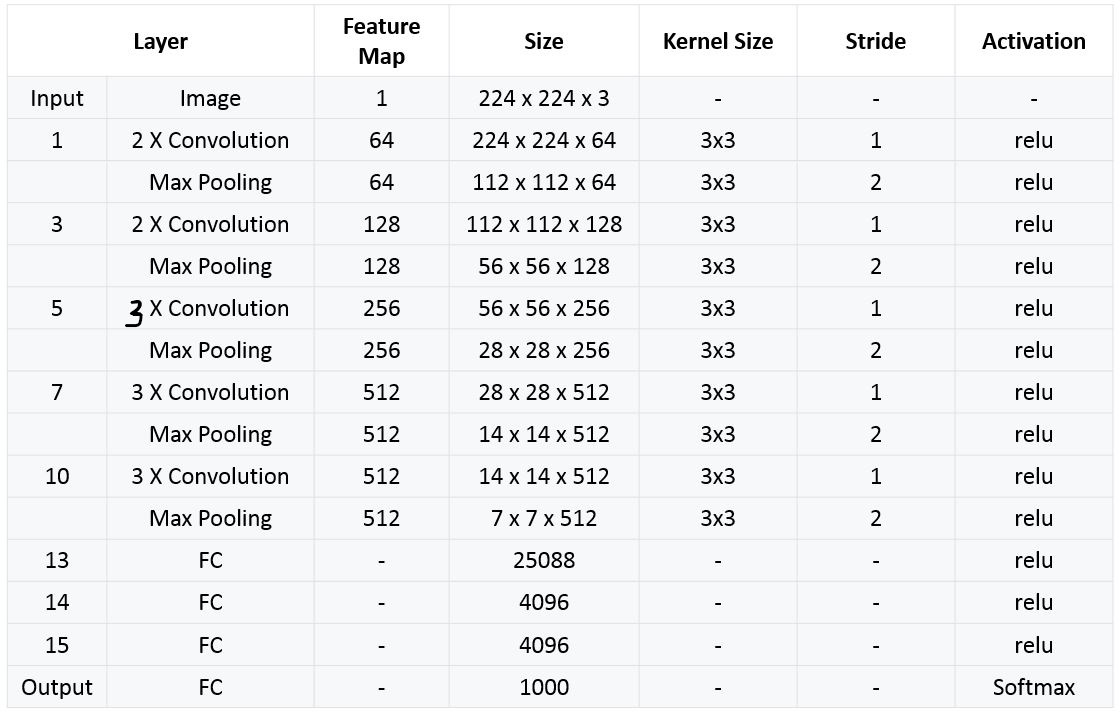

In [114]:
# The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.
model_vgg16 = Sequential()

"""
1. Input Layer:
    - The input layer expects input images of size (224, 224, 3):
    - Representing images with a height of 224 pixels, width of 224 pixels, and 3 color channels (RGB).
---------------------------------------------------------------------------------------------------------

2. Convolutional Layers (13 layers):

    - The VGG16 model starts with a series of convolutional layers, each followed by a ReLU activation function.
    - These convolutional layers are denoted as Conv2D layers in Keras and are responsible for capturing various image features.
    
    --- Block-1
    * The first two convolutional layers have 64 filters each with a kernel size of (3, 3).
    
    --- Block-2
    * The following two convolutional layers have 128 filters with a kernel size of (3, 3).

    --- Block-3
    * The next three convolutional layers have 256 filters each with a kernel size of (3, 3).

    --- Block-4
    * The subsequent three convolutional layers have 512 filters each with a kernel size of (3, 3).
    
    --- Block-5
    * The final three convolutional layers have 512 filters each with a kernel size of (3, 3).
---------------------------------------------------------------------------------------------------------

3. Max Pooling Layers (5 layers):

- After each block of  convolutional layers, a max pooling layer is applied to reduce the spatial dimensions of the feature maps.
- The max pooling layers have a pool size of (2, 2) and a stride length of (2, 2).
- The max pooling operation selects the maximum value within each pooling window and downsamples the feature maps.
---------------------------------------------------------------------------------------------------------

- When padding="same", it means that the padding is applied in such a way that the output feature map has the same spatial dimensions (height and width) as the input feature map. 
- It ensures that the convolution operation does not reduce the spatial dimensions of the feature map.
- The ReLU activation function introduces non-linearity to the output of each convolutional layer.
"""

model_vgg16 = Sequential()
# ================================ First Block ================================
model_vgg16.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu", name="conv1.1"))
model_vgg16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", name="conv1.2"))
model_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-1"))
# ================================ Second Block ================================
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name="conv2.1"))
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name="conv2.2"))
model_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-2"))
# ================================ Third Block ================================
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv3.1"))
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv3.2"))
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv3.3"))
model_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-3"))
# ================================ Forth Block ================================
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv4.1"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv4.2"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv4.3"))
model_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-4"))
# ================================ Fifth Block ================================
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv5.1"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv5.2"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv5.3"))
model_vgg16.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="pool-5"))